In [24]:
import os 
import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

import torchvision.transforms as transforms
import torchvision.models as models


In [17]:
def display_images(image_path, title, max_images = 4):
    plt.figure(figsize=(8,6))
    for i, image_path in enumerate(image_paths[:max_images]):
        img = plt.imread(image_path)
        plt.subplot(1, max_images, i+1)
        plt.imshow(img)
        plt.title(title, fontsize=10)
        plt.axis('off')
    plt.show()


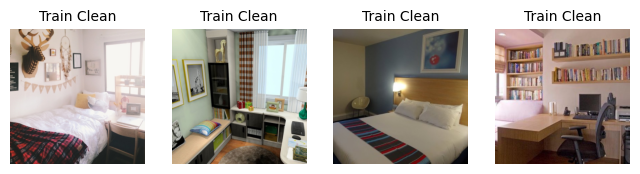

Train Clean 총 이미지 수: 96


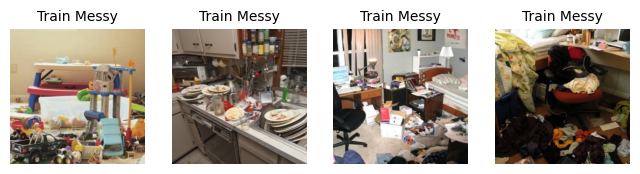

Train Messy 총 이미지 수: 96


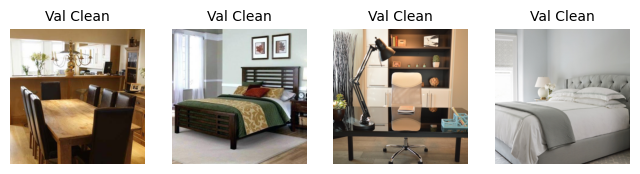

Val Clean 총 이미지 수: 10


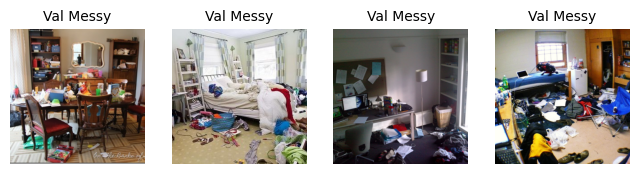

Val Messy 총 이미지 수: 10


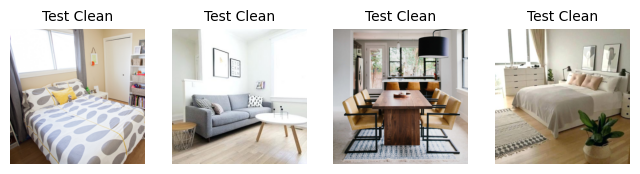

Test Clean 총 이미지 수: 5


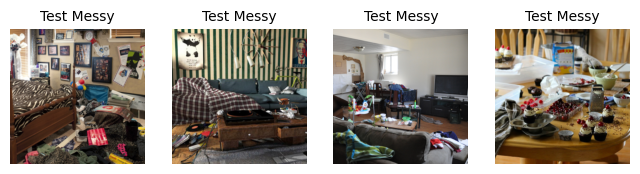

Test Messy 총 이미지 수: 5


In [18]:
categories = ['Train Clean', 'Train Messy', 'Val Clean', 'Val Messy', 'Test Clean', 'Test Messy']
for category in categories:
    image_paths = glob.glob(f'/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/{category.lower().replace(" ", "/")}/*')
    display_images(image_paths, category)
    print(f"{category} 총 이미지 수: {len(image_paths)}")                        

### 데이터 분포 시각화

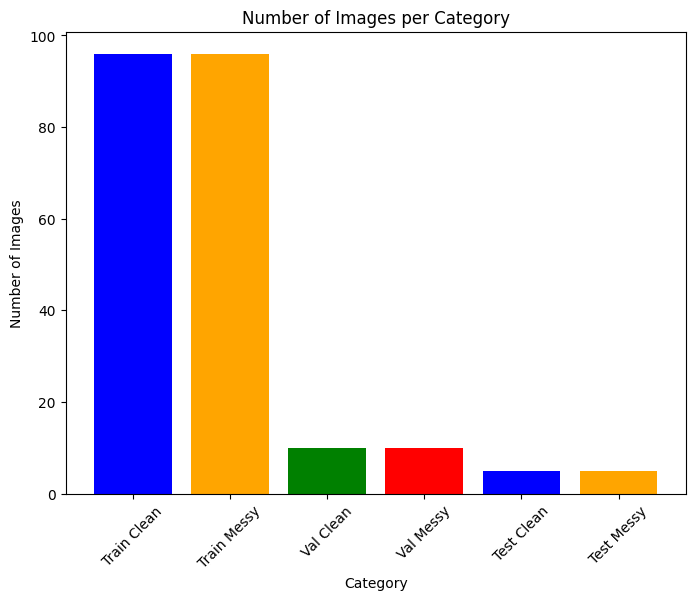

In [19]:
plt.figure(figsize=(8,6))
plt.bar(categories, [len(glob.glob(f'/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/{category.lower().replace(" ", "/")}/*')) for category in categories], color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


### 데이터 전처리 및 로더 생성

In [42]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

train_dataset = ImageFolder('/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Train', transform=transform)
val_dataset = ImageFolder('/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [43]:
print(train_dataset)
print(val_dataset)

Dataset ImageFolder
    Number of datapoints: 192
    Root location: /Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset ImageFolder
    Number of datapoints: 20
    Root location: /Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


### AlexNet 모델 불러오기 및 구조 확인

In [44]:
net = models.alexnet(pretrained=True)
print(net)

/opt/anaconda3/envs/imagebinary/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/imagebinary/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [45]:
for param in net.parameters():
    param.requires_grad = False

In [46]:
net.classifier[6] = nn.Linear(4096, 2)

net.classifier[5].requires_grad = True
net.classifier[6].requires_grad = True

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001)

In [48]:
def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0 
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [49]:
train_losses = []
val_losses = []
val_accuracies = []

In [50]:
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    net.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    
    val_accuracy = calculate_accuracy(val_loader, net)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

print('Training complete')

Epoch 1, Train Loss: 0.3254, Val Loss: 0.0489, Val Accuracy: 100.00%
Epoch 2, Train Loss: 0.1413, Val Loss: 0.0208, Val Accuracy: 100.00%
Epoch 3, Train Loss: 0.0997, Val Loss: 0.0229, Val Accuracy: 100.00%
Epoch 4, Train Loss: 0.0745, Val Loss: 0.0133, Val Accuracy: 100.00%
Epoch 5, Train Loss: 0.0651, Val Loss: 0.0172, Val Accuracy: 100.00%
Epoch 6, Train Loss: 0.0389, Val Loss: 0.0162, Val Accuracy: 100.00%
Epoch 7, Train Loss: 0.0432, Val Loss: 0.0105, Val Accuracy: 100.00%
Epoch 8, Train Loss: 0.0447, Val Loss: 0.0128, Val Accuracy: 100.00%
Epoch 9, Train Loss: 0.0510, Val Loss: 0.0121, Val Accuracy: 100.00%
Epoch 10, Train Loss: 0.0292, Val Loss: 0.0094, Val Accuracy: 100.00%
Training complete


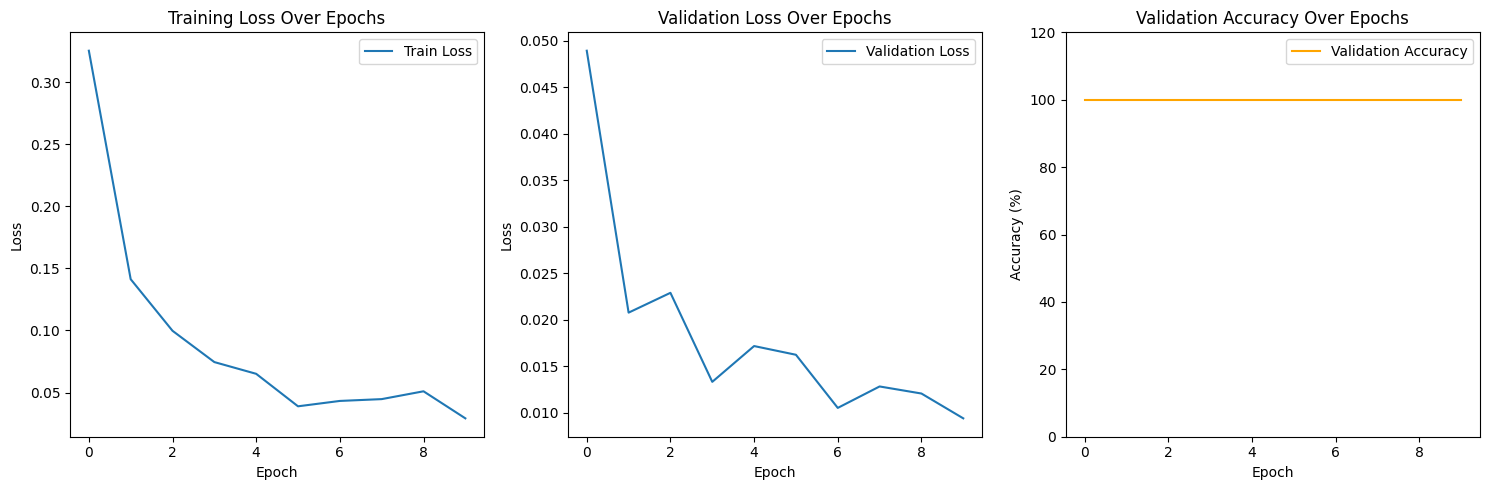

In [53]:
# 학습 손실과 검증 정확도 그래프 그리기
plt.figure(figsize=(15, 5))

# 학습 손실 그래프
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 검증 정확도 그래프
plt.subplot(1, 3, 2)
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

# 검증 정확도 그래프
plt.subplot(1, 3, 3)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 120)
plt.title('Validation Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)

In [55]:
class_folders = {
    'clean': '/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Test/Clean',
    'messy': '/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/1/Test/Messy'
}

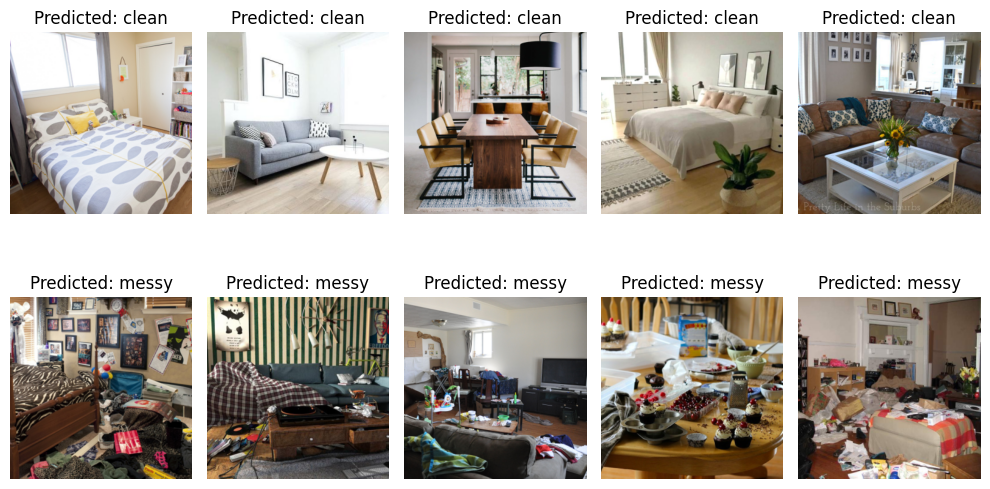

In [57]:
plt.figure(figsize=(10, 6))
counter = 1

for class_name, folder_path in class_folders.items():
    image_paths = glob.glob(os.path.join(folder_path, '*'))
    selected_paths = image_paths[:5]
    
    for image_paths in selected_paths:
        image = load_and_transform_image(image_paths, transform)
        
        net.eval()
        
        with torch.no_grad():
            outputs = net(image)
            _, predicted = torch.max(outputs.data, 1)
        prediction = 'Clean' if predicted.item() == 0 else 'Messy'
        
        plt.subplot(len(class_folders), 5, counter)
        plt.imshow(Image.open(image_paths))
        plt.title(f'Predicted: {class_name}')
        plt.axis('off')
        counter += 1
plt.tight_layout()
plt.show()